In [1]:
#Load Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [2]:
#Load Dataset
df = pd.read_csv('illnessstudy.csv')
df.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,M
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,M
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,M
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,M
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,M


In [3]:
#Create x (we ignore the y variable)
x = df.drop('diagnosis', axis=1).to_numpy()

#Scale the Data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
data_transformed=sc.fit_transform(x)

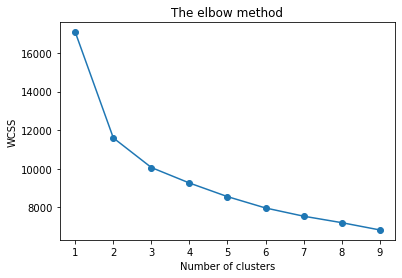

In [4]:
#Determine optimum number of clusters
wcss = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10,random_state = 100)
    kmeans.fit(data_transformed)
    wcss.append(kmeans.inertia_)
    
#Plot Elbow Method
plt.plot(range(1, 10), wcss,marker='o')
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()

For n_clusters= 2, The Silhouette Coefficient is 0.3196567328996098
For n_clusters= 3, The Silhouette Coefficient is 0.2638171898578035
For n_clusters= 4, The Silhouette Coefficient is 0.10884391816948957
For n_clusters= 5, The Silhouette Coefficient is 0.06626928606214222
For n_clusters= 6, The Silhouette Coefficient is 0.042538821002107305
For n_clusters= 7, The Silhouette Coefficient is 0.025457775642984817
For n_clusters= 8, The Silhouette Coefficient is 0.0245532950327258
For n_clusters= 9, The Silhouette Coefficient is 0.01079399927393977


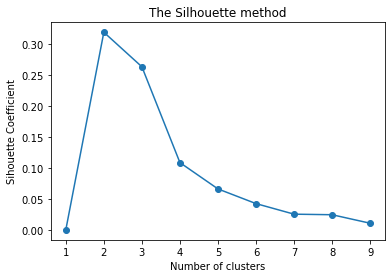

In [5]:
#Create Silhouette Coefficients
scores= [0]
for n_cluster in range(2, 10):
       kmeans = KMeans(n_clusters=n_cluster).fit(x)
       label = kmeans.labels_
       sil_coeff = silhouette_score(data_transformed, label, metric='euclidean')
       scores.append(sil_coeff) 
       print('For n_clusters= {}, The Silhouette Coefficient is {}'.format(n_cluster, sil_coeff))

#Plot Silhouette
plt.plot(range(1,10), scores, marker='o')
plt.title('The Silhouette method')
plt.xlabel('Number of clusters')
plt.ylabel('Sihouette Coefficient') 
plt.show()

# Now we are sure that optimum number of clusters is 2

In [6]:
#Create KMeans with 2 Clusters

#Apply KMeans clustering
kmeans = KMeans(n_clusters = 2, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 100)
y_kmeans = kmeans.fit_predict(data_transformed)

#Add Prediction column to dataset
df2= df.drop('diagnosis', axis=1)
df2['New Cluster']=kmeans.labels_
df2['New Cluster'] = df2['New Cluster'].map({0:'Cluster 1', 1:'Cluster 2'}) 
df2.head()


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,New Cluster
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,Cluster 1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,Cluster 1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,Cluster 1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,Cluster 1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,Cluster 1


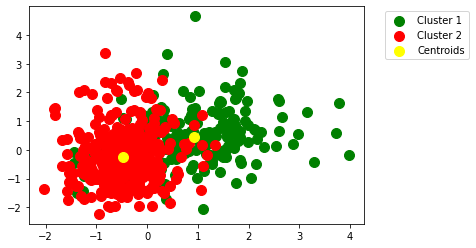

In [7]:
#Plot of 2 Clusters
plt.scatter(data_transformed[y_kmeans == 0, 0], data_transformed[y_kmeans == 0, 1], s = 100, c = 'green', label = 'Cluster 1')
plt.scatter(data_transformed[y_kmeans == 1, 0], data_transformed[y_kmeans == 1, 1], s = 100, c = 'red', label = 'Cluster 2')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'yellow', label = 'Centroids')
#Legend
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)

# Let's see how the clustering reacts when we changes the number of clusters

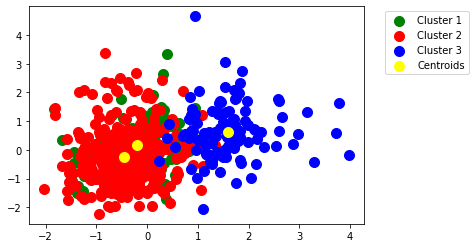

In [8]:
#Apply KMeans clustering
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 100)
y_kmeans = kmeans.fit_predict(data_transformed)

#Plot of 3 Clusters
plt.scatter(data_transformed[y_kmeans == 0, 0], data_transformed[y_kmeans == 0, 1], s = 100, c = 'green', label = 'Cluster 1')
plt.scatter(data_transformed[y_kmeans == 1, 0], data_transformed[y_kmeans == 1, 1], s = 100, c = 'red', label = 'Cluster 2')
plt.scatter(data_transformed[y_kmeans == 2, 0], data_transformed[y_kmeans == 2, 1], s = 100, c = 'blue', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'yellow', label = 'Centroids')
#Legend
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)

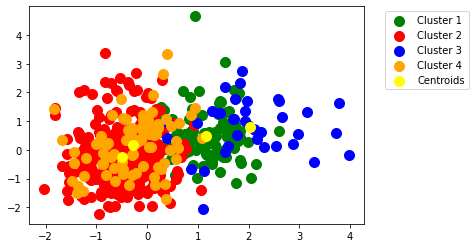

In [9]:
#Apply KMeans clustering
kmeans = KMeans(n_clusters = 4, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 100)
y_kmeans = kmeans.fit_predict(data_transformed)

#Plot of 4 Clusters
plt.scatter(data_transformed[y_kmeans == 0, 0], data_transformed[y_kmeans == 0, 1], s = 100, c = 'green', label = 'Cluster 1')
plt.scatter(data_transformed[y_kmeans == 1, 0], data_transformed[y_kmeans == 1, 1], s = 100, c = 'red', label = 'Cluster 2')
plt.scatter(data_transformed[y_kmeans == 2, 0], data_transformed[y_kmeans == 2, 1], s = 100, c = 'blue', label = 'Cluster 3')
plt.scatter(data_transformed[y_kmeans == 3, 0], data_transformed[y_kmeans == 3, 1], s = 100, c = 'orange', label = 'Cluster 4')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'yellow', label = 'Centroids')
#Legend
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)

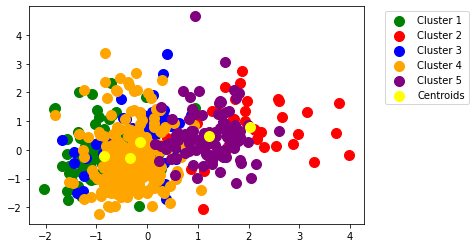

In [10]:
#Apply KMeans clustering
kmeans = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 100)
y_kmeans = kmeans.fit_predict(data_transformed)

#Plot of 4 Clusters
plt.scatter(data_transformed[y_kmeans == 0, 0], data_transformed[y_kmeans == 0, 1], s = 100, c = 'green', label = 'Cluster 1')
plt.scatter(data_transformed[y_kmeans == 1, 0], data_transformed[y_kmeans == 1, 1], s = 100, c = 'red', label = 'Cluster 2')
plt.scatter(data_transformed[y_kmeans == 2, 0], data_transformed[y_kmeans == 2, 1], s = 100, c = 'blue', label = 'Cluster 3')
plt.scatter(data_transformed[y_kmeans == 3, 0], data_transformed[y_kmeans == 3, 1], s = 100, c = 'orange', label = 'Cluster 4')
plt.scatter(data_transformed[y_kmeans == 4, 0], data_transformed[y_kmeans == 4, 1], s = 100, c = 'purple', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'yellow', label = 'Centroids')
#Legend
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)